# HA 2

prepared by Danila Danko

## Task 1

In [3]:
# %matplotlib qt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv(f'case2.txt', header=None,names=['x','y'])

[]

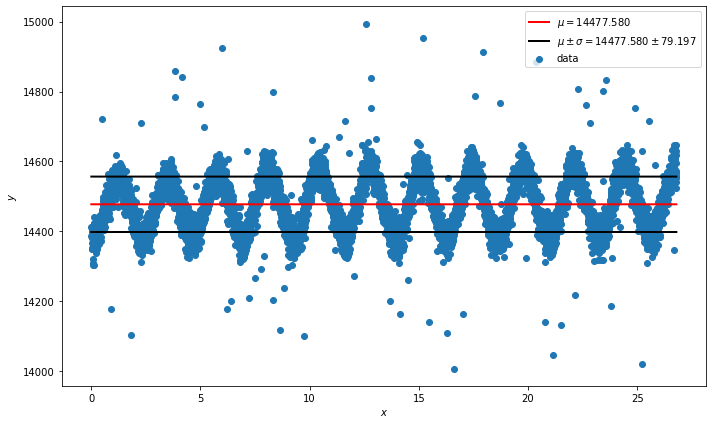

In [4]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10, 6))
ax.scatter(df.x,df.y,label='data')
y_mean = np.mean(df.y)
y_std = np.std(df.y)
x_data = df.x
y_data = df.y
ax.plot(x_data, np.full_like(df.x, y_mean), c = 'r', label=f'$\\mu = {y_mean:.3f}$', linewidth=2)
ax.plot(x_data, np.full_like(df.x, y_mean + y_std), c = 'k', label=f'$\\mu \\pm \\sigma = {y_mean:.3f} \\pm {y_std:.3f}$', linewidth=2)
ax.plot(x_data, np.full_like(df.x, y_mean - y_std), c = 'k', linewidth=2)
ax.legend()
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
plt.tight_layout()
plt.plot()

Let our model be $A\sin{(B x + C)} + D$, where

$A = \sigma$

$B = \frac{2 \cdot 11.5 \cdot \pi}{\max{(x)}} $

$C = -\frac{\pi}{2}$

$D = \mu$

In [5]:
x_min = df.x.to_numpy()[0]
x_max = df.x.to_numpy()[-1]
cycles = 11.5
A = y_std
B = cycles * 2 * np.pi / x_max
C = -np.pi/2
D = y_mean

[]

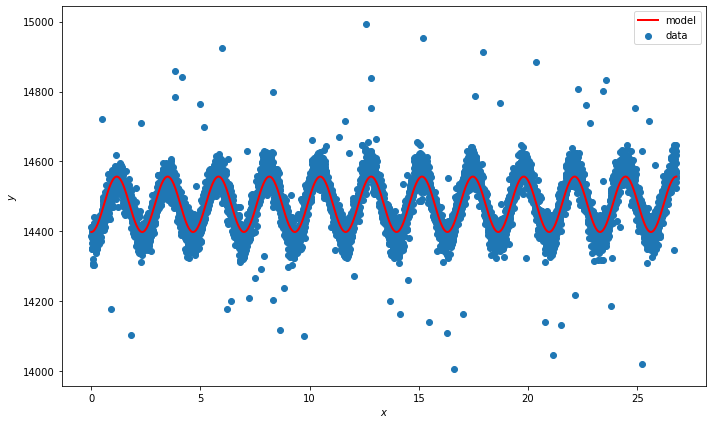

In [6]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10, 6))
ax.scatter(x_data,y_data,label='data')
y_model = A * np.sin(B * x_data + C) + D
ax.plot(x_data, y_model, c='r', label = f'model', linewidth = 2)
ax.legend()
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
plt.tight_layout()
plt.plot()

Then, $x=y$ will change as
$\frac{dy}{dx}=A B \cos{(Bx+C)}$

So, we get the expression

$y_{k+1}^{opt} = K \cdot y_{k+1}^{measured} + (1 - K) \cdot (y_{k}^{opt} + A B \cos{(Bx+C)} \cdot \delta x)$

Our sensor seems to be quite noisy, so we take $K = 0.1$

In [7]:
y_opt = np.zeros_like(x_data)
y_opt[0] = y_data[0]

K = 0.1

for i in range(len(x_data)-1):
    dx = x_data[i+1] - x_data[i]
    modelled = (1 - K) * (y_opt[i] + A * B * np.cos(B * x_data[i] + C) * dx)
    measured = K * y_data[i]
    y_opt[i+1] = modelled + measured

[]

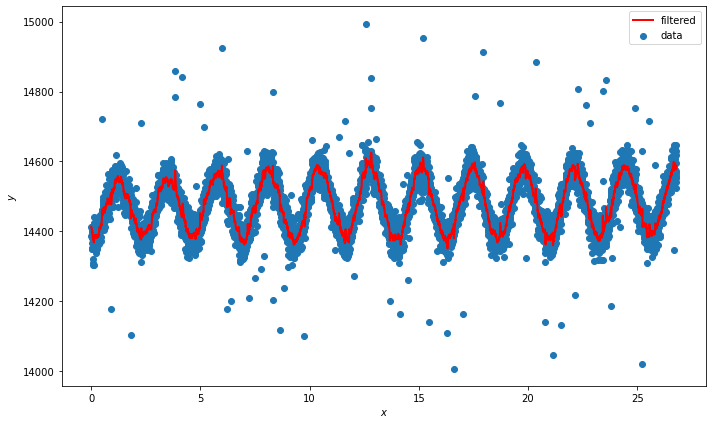

In [8]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10, 6))
ax.scatter(x_data,y_data,label='data')
y_model = A * np.sin(B * x_data + C) + D
ax.plot(x_data, y_opt, c='r', label = f'filtered', linewidth = 2)
ax.legend()
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
plt.tight_layout()
plt.plot()

## Task 2

Below, I experimented with this [tutorial](https://learnopencv.com/camera-calibration-using-opencv/)

In [1]:
#!/usr/bin/env python

import cv2
import numpy as np
import os
import glob

# Defining the dimensions of checkerboard
CHECKERBOARD = (6,9)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Creating vector to store vectors of 3D points for each checkerboard image
objpoints = []
# Creating vector to store vectors of 2D points for each checkerboard image
imgpoints = [] 


# Defining the world coordinates for 3D points
objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None

# Extracting path of individual image stored in a given directory
images = glob.glob('./images/*.jpg')
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    # If desired number of corners are found in the image then ret = true
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    
    """
    If desired number of corner are detected,
    we refine the pixel coordinates and display 
    them on the images of checker board
    """
    if ret == True:
        objpoints.append(objp)
        # refining pixel coordinates for given 2d points.
        corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
        
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
    
    # cv2.imshow('img',img)
    cv2.waitKey(0)

cv2.destroyAllWindows()


In [10]:
print(images)
h,w = img.shape[:2]

"""
Performing camera calibration by 
passing the value of known 3D points (objpoints)
and corresponding pixel coordinates of the 
detected corners (imgpoints)
"""
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)


[]


NameError: name 'img' is not defined